In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import copy, math
import numpy as np

import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [134]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x.shape


(768, 8)

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Convert train and test data to arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"{X_train.shape}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(576, 8)
(192, 8)
(576,)
(192,)


In [138]:
def compute_cost_logistic(X, y, w, b):


    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


def compute_gradient_logistic(X, y, w, b): 

    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  


def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    
    J_history = []
    w =w_in
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing



w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.01
iters = 1000

w_out, b_out,J_history= gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predictz(w, b, x):
    pred = sigmoid(np.dot(x, w) + b)
    return (pred > 0.5).astype(int)



predicted_values = predictz(w_out, b_out, X_test)

def calculate_correct_predictions(predicted_labels, actual_labels):
    # Count the number of correct predictions
    correct_predictions = sum(predicted_labels == actual_labels)

    return correct_predictions

# num_correct_predictions = calculate_correct_predictions(predicted_values , y)
num_correct_predictions = calculate_correct_predictions(predicted_values , y_test)
print("Total number of correct predictions:", num_correct_predictions)

test_accuracy = (num_correct_predictions/X_test.shape[0])
print(f"Test Accuracy of model is: {test_accuracy}")


predicted_values = predictz(w_out, b_out, X_train)

def calculate_correct_predictions(predicted_labels, actual_labels):
    # Count the number of correct predictions
    correct_predictions = sum(predicted_labels == actual_labels)

    return correct_predictions

# num_correct_predictions = calculate_correct_predictions(predicted_values , y)
num_correct_predictions = calculate_correct_predictions(predicted_values , y_train)
print("Total number of correct predictions:", num_correct_predictions)

test_accuracy = (num_correct_predictions/X_train.shape[0])
print(f"Train Accuracy of model is: {test_accuracy}")

Iteration    0: Cost 11.070759803593095   


C:\Users\mayur dabade\AppData\Local\Temp\ipykernel_9792\321420340.py:9: RuntimeWarning: divide by zero encountered in log
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
C:\Users\mayur dabade\AppData\Local\Temp\ipykernel_9792\321420340.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)


Iteration  100: Cost nan   
Iteration  200: Cost nan   
Iteration  300: Cost nan   
Iteration  400: Cost nan   
Iteration  500: Cost 40.50473945706787   
Iteration  600: Cost 31.064310320523802   
Iteration  700: Cost 41.425924931811444   
Iteration  800: Cost nan   
Iteration  900: Cost nan   

updated parameters: w:[ 1.02328353 -0.15124238 -1.13707352 -0.08518533 -0.22874831 -0.03043755
  0.02553986  0.19193646], b:-0.3584494504405634
Total number of correct predictions: 123
Test Accuracy of model is: 0.640625
Total number of correct predictions: 377
Train Accuracy of model is: 0.6545138888888888


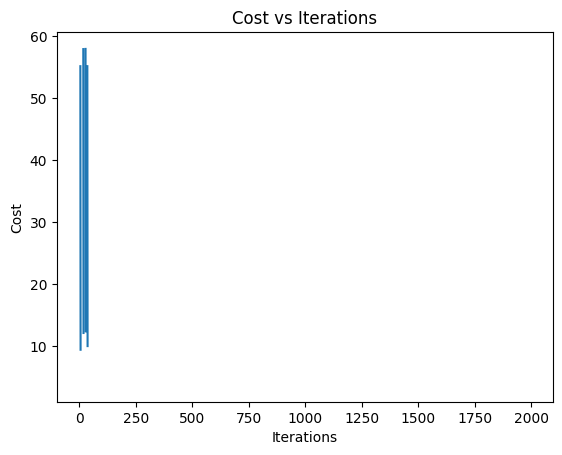

In [137]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt

# Plot the cost vs iterations
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


# Plot the logarithm of the cost vs iterations
# plt.plot(range(len(J_history)), np.log(J_history))
# plt.xlabel('Iterations')
# plt.ylabel('Log(Cost)')
# plt.title('Log(Cost) vs Iterations')
# plt.show()



In [139]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
